<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [11]:
## Write your code here
df_numbers = df.select_dtypes(include='number')
# print(df_numbers.columns)


for col in df_numbers.columns:
    df_median = df_numbers[col].median()
    df[col] = df[col].fillna(value=df_median)


df.select_dtypes(include='number').isnull().sum()

ResponseId             0
CompTotal              0
WorkExp                0
JobSatPoints_1         0
JobSatPoints_4         0
JobSatPoints_5         0
JobSatPoints_6         0
JobSatPoints_7         0
JobSatPoints_8         0
JobSatPoints_9         0
JobSatPoints_10        0
JobSatPoints_11        0
ConvertedCompYearly    0
JobSat                 0
dtype: int64

In [12]:
df_objects = df.select_dtypes(include='object')
# print(df_objects.columns)


for col in df_objects.columns:
    df_mode = df_objects[col].mode()[0]
    df[col] = df_objects[col].fillna(value=df_mode)


df.select_dtypes(include='object').isnull().sum()

MainBranch              0
Age                     0
Employment              0
RemoteWork              0
Check                   0
                       ..
ProfessionalCloud       0
ProfessionalQuestion    0
Industry                0
SurveyLength            0
SurveyEase              0
Length: 100, dtype: int64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [37]:
s=df['YearsCodePro']
# Step 1 & 2: Define a mapping for non-numeric strings and convert
def convert_experience_to_numeric(value):
    if pd.isna(value):
        return np.nan # Keep NaN as NaN
    elif value == 'Less than 1 year':
        return 0 # Or 0.5, depending on your interpretation
    elif value == 'More than 50 years':
        return 51 # Or 50, or a higher cap like 60, depending on your bins
    else:
        try:
            return int(value)
        except ValueError:
            return np.nan # Handle any other unexpected non-numeric strings as NaN

# Apply the conversion function to the Series
s_numeric = s.apply(convert_experience_to_numeric)

print("\nConverted Numeric Series:")
print(s_numeric.value_counts(dropna=False).sort_index())
print(f"\nData type after conversion: {s_numeric.dtype}")

# Now that it's numeric, you can use pd.cut()
# Example: Binning the numeric experience
bins = [-1, 0, 5, 10, 20, 30, 50, 100] # Adjusted bins to include 0 and 51+
labels = ['<1 Year', '1-5 Years', '6-10 Years', '11-20 Years', '21-30 Years', '31-50 Years', '50+ Years']

s_binned = pd.cut(s_numeric, bins=bins, labels=labels, right=True, include_lowest=True)
df['YearsCodePro_binned'] = s_binned.copy()

print("\nBinned Series:")
print(s_binned.value_counts(dropna=False).sort_index())


Converted Numeric Series:
YearsCodePro
0      2856
1      2639
2     17995
3      4093
4      3215
5      3526
6      2843
7      2517
8      2549
9      1493
10     3251
11     1312
12     1777
13     1127
14     1082
15     1635
16      946
17      814
18      867
19      516
20     1549
21      380
22      492
23      448
24      632
25      998
26      426
27      380
28      342
29      196
30      689
31      106
32      194
33      132
34      169
35      285
36      119
37      104
38      134
39       54
40      194
41       51
42       55
43       37
44       42
45       56
46       21
47       10
48       14
49       11
50       14
51       50
Name: count, dtype: int64

Data type after conversion: int64

Binned Series:
YearsCodePro
<1 Year         2856
1-5 Years      31468
6-10 Years     12653
11-20 Years    11625
21-30 Years     4983
31-50 Years     1802
50+ Years         50
Name: count, dtype: int64


In [22]:
## Write your code here
# Calculate the median JobSat for each range.

sorted(df['JobSat'].unique().tolist())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [17]:
df['JobSat'].dtype

dtype('float64')

In [26]:
bins=[-1, 3, 6, 9, 10, 11]
labels = ["0-3", "3-6", "6-9", "9-10", "Above 10"]

df['JobSat_binned'] = pd.cut(df['JobSat'], bins=bins, labels=labels,
                       right=True, include_lowest=True)


In [30]:
df.groupby('JobSat_binned', observed=True)['JobSat'].median()

JobSat_binned
0-3      2.0
3-6      6.0
6-9      7.0
9-10    10.0
Name: JobSat, dtype: float64

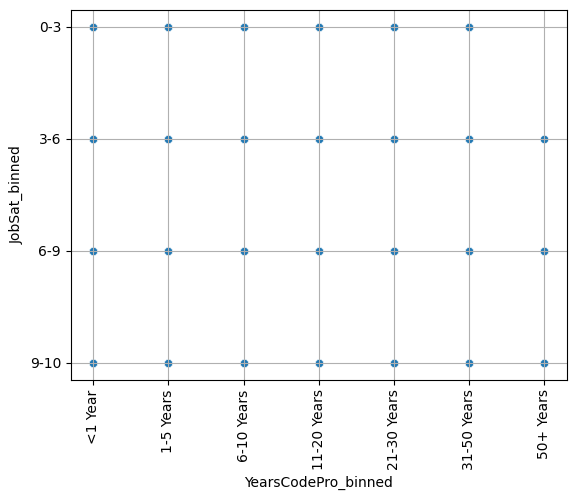

In [39]:
sns.scatterplot(data=df, x="YearsCodePro_binned", y="JobSat_binned")
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


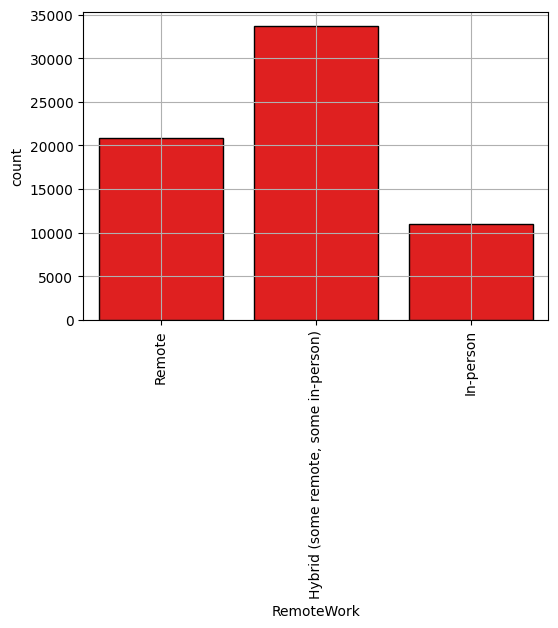

In [49]:
## Write your code here

fig = plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="RemoteWork", edgecolor='black', color="red")
plt.xticks(rotation=90)
plt.grid()
plt.show()

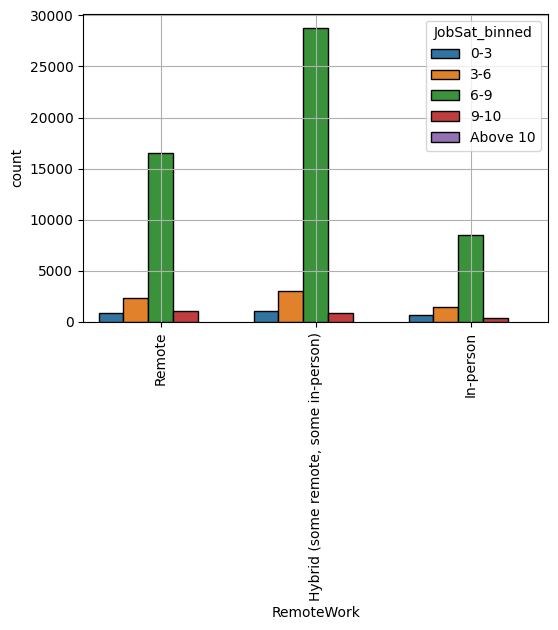

In [51]:
fig = plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="RemoteWork", hue="JobSat_binned", 
              edgecolor='black')
plt.xticks(rotation=90)
plt.grid()
plt.show()

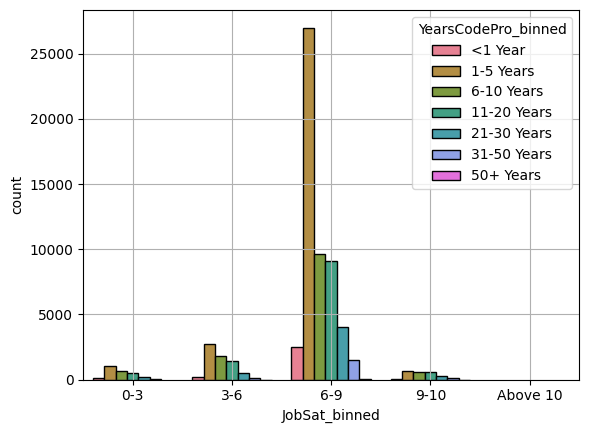

In [55]:
## Write your code here
sns.set_palette("RdBu")
sns.countplot(data=df, x="JobSat_binned",
              hue="YearsCodePro_binned", edgecolor='black')
plt.grid()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [63]:
# sorted(df.columns.tolist())

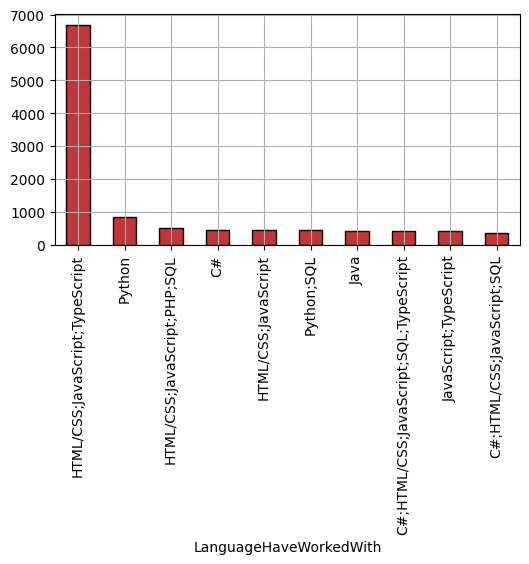

In [70]:
## Write your code here
l10 = df['LanguageHaveWorkedWith'].value_counts()[:10]
l10.plot.bar(edgecolor='black', figsize=(6,3))
plt.grid()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


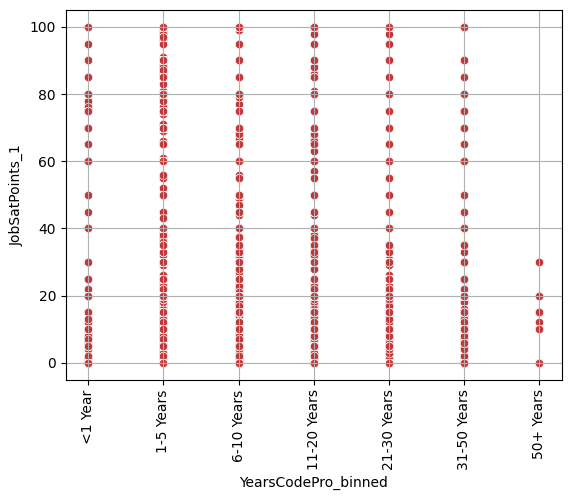

In [77]:
## Write your code here
sns.scatterplot(df, x="YearsCodePro_binned", y="JobSatPoints_1")
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [82]:
len(df['Employment'].unique().tolist())

110

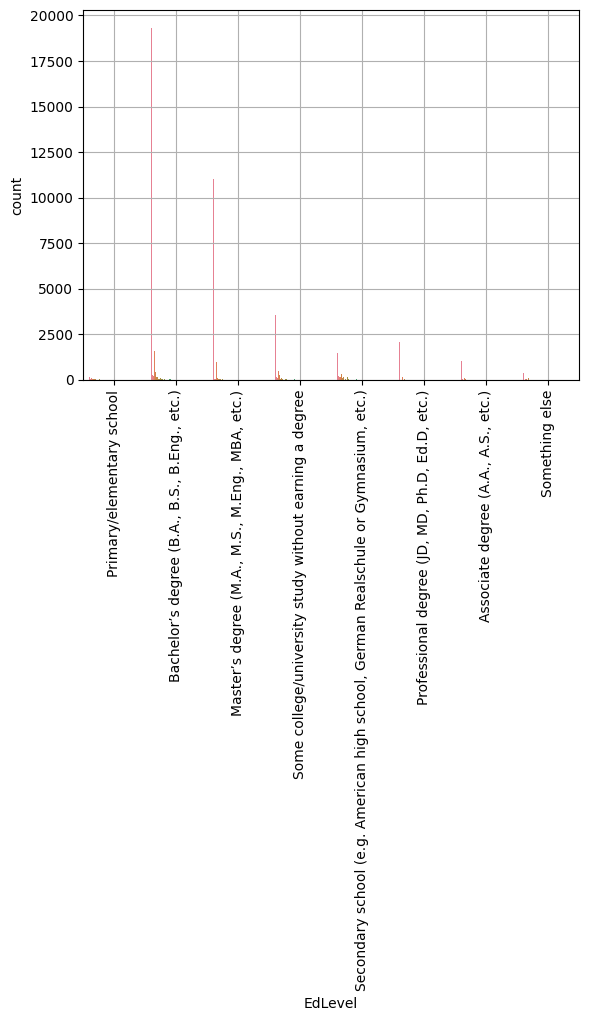

In [80]:
## Write your code here
sns.countplot(df, x="EdLevel", hue="Employment", legend=False)
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

df.to_csv("saved_df")

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
